In [2]:
import json
import matplotlib.pyplot as plt
import subprocess

In [7]:
entities = [
    {
      "name": "Grid",
      "cost_prod": [1.0],
      "power_prod": [10.0],
      "cost_cons": [-1.0],
      "power_cons": [10.0],
      "entity_type": "Grid"
    },
    {
      "power_cons": [1.5, 1.5, 1, 2],
      "eff_cons": [1.0],
      "cost_cons": [0.0],
      "name": "Household",
      "entity_type": "Consumer"
    },
    {
      "can_be_disabled": False,
      "power_prod": [0,2,2,0],
      "eff_prod": [1.0],
      "cost_prod": [0.0],
      "name": "PV",
      "entity_type": "Producer"
    },
    {
      "power_prod": [2.0],
      "eff_prod": [1.0],
      "cost_prod": [0.0],
      "power_cons": [2.0],
      "eff_cons": [1.0],
      "cost_cons": [0.0],
      "name": "Battery",
      "storage_capacity": 20.0,
      "start_capacity": 0.0,
      "entity_type": "Storage"
    }
]


to_stdin = {
    "entities": entities,
    "timesteps": 4*4
}

process = subprocess.Popen(['./target/release/solver'], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
stdout, stderr = process.communicate(input=json.dumps(to_stdin).encode())
result = json.loads(stdout)

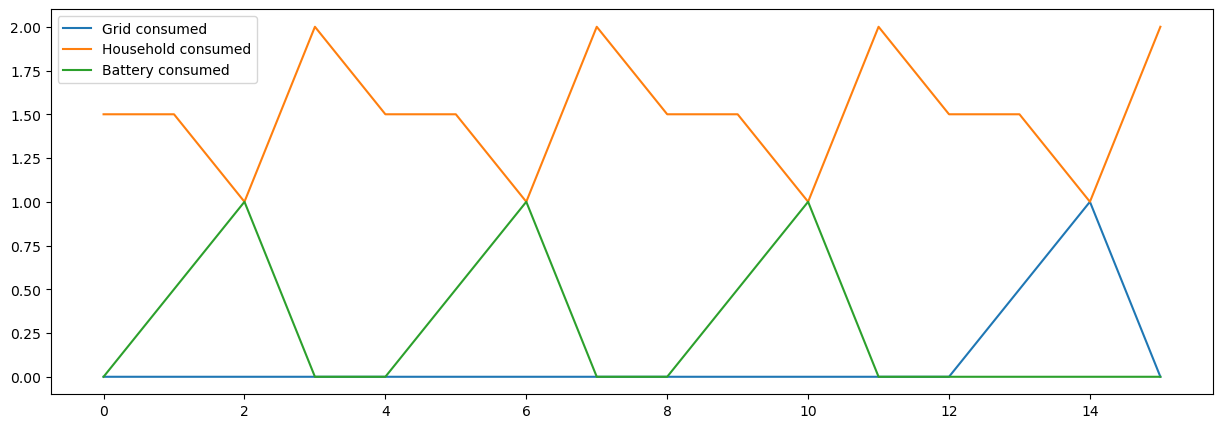

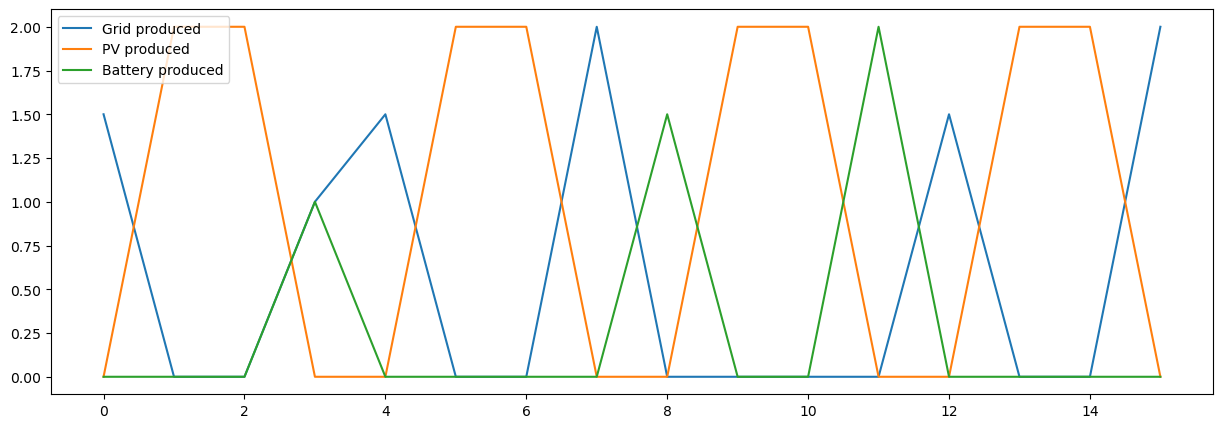

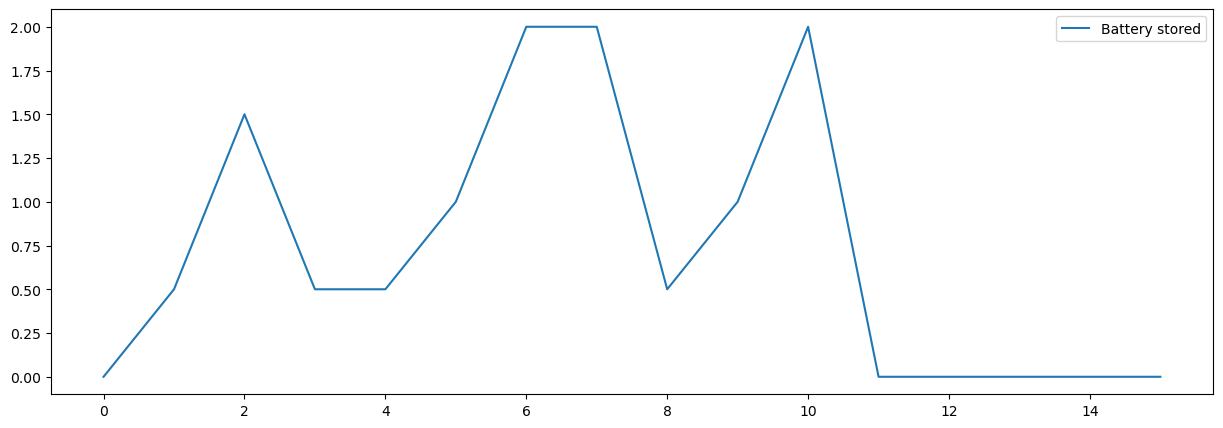

In [8]:
figsize = (15, 5)

fig_consumed, ax_consumed = plt.subplots(figsize=figsize)
fig_produced, ax_produced = plt.subplots(figsize=figsize)
fig_stored, ax_stored = plt.subplots(figsize=figsize)


for entity in result:
    if 'Grid' == entity['entity_type']:
        name = entity['name']
        produced = entity['produced']
        consumed = entity['consumed']

        ax_consumed.plot(consumed, label=f'{name} consumed')
        ax_produced.plot(produced, label=f'{name} produced')

    if 'Consumer' == entity['entity_type']:
        name = entity['name']
        consumed = entity['consumed']

        ax_consumed.plot(consumed, label=f'{name} consumed')


    if 'Producer' == entity['entity_type']:

        name = entity['name']
        produced = entity['produced']

        ax_produced.plot(produced, label=f'{name} produced')

    if 'Storage' == entity['entity_type']:
        name = entity['name']
        stored = entity['stored']
        consumed = entity['consumed']
        produced = entity['produced']

        ax_stored.plot(stored, label=f'{name} stored')
        ax_consumed.plot(consumed, label=f'{name} consumed')
        ax_produced.plot(produced, label=f'{name} produced')

ax_consumed.legend()
ax_produced.legend()
ax_stored.legend()